## Data Profler

This notebook uses Profiling class. This class is built on top of already established pandas library.
Profiling class inherits from pandas DataFrame class inorder to add bespoke functionality to the dataframe
and also to override few methods in which work is performed before calling the super class method.

The Profiling class combines both pandas DataFrame and pandas_profiling library. So the user don't have to switch between classes. User works with one single library, without compromising the syntax of already familiar pandas library.

The aim of the Profiling class is to provide insight into dataset as quickly as possible, so that users would know what kind of dataset they are dealing with and helping them building models faster by querying the dataset faster.

## Dataset

This notebook makes use of the Roadsafety data which could be found [here](https://data.gov.uk/dataset/road-accidents-safety-data)

In [1]:
from profiling import Profiling
%matplotlib inline
import matplotlib.pyplot as plt

##### Because Profiling class inherits from pd.DataFrame it has access to its own methods plus the methods of the base class

In [2]:
p = Profiling(file_path='Datasources/Acc.csv')

In [3]:
p.read_csv()

##### To view name and types of columns we could use either pandas describe method on certain columns or on whole dataset or we could use Profiling details method which uses some bespoke login to give enhanced information about variables. Lets see both in action

In [4]:
p.psubset(['Number_of_Casualties', 'Latitude'], rows=p.shape[0]).describe() # Pandas describe

Number_of_Casualties       Latitude
count         129982.000000  129953.000000
mean               1.315513      52.439387
std                0.765469       1.382508
min                1.000000      49.929558
25%                1.000000      51.470399
50%                1.000000      51.900636
75%                1.000000      53.393024
max               42.000000      60.480924

In [5]:
_ = p.psubset(['Number_of_Casualties', 'Latitude'], rows=p.shape[0]).details() # Profiling details

Number_of_Casualties -->
count    129982.000000
mean          1.315513
std           0.765469
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          42.000000
Name: Number_of_Casualties, dtype: float64
It looks like a geometry column, aggregating it would produce inappropriate results
Latitude -->
count    129953.000000
mean         52.439387
std           1.382508
min          49.929558
25%          51.470399
50%          51.900636
75%          53.393024
max          60.480924
Name: Latitude, dtype: float64


##### The result above gave the similar answer excepts it warns that Latitude column could be geometry column

#### Slicing a Profiling object also returns a Profiling object so that user would continue using the profiling object and make use of methods Profiling and DataFrame classes, although it would be a new object

In [6]:
p1 = p[['Day_of_Week', 'Number_of_Casualties']]
print('Address of p:', id(p), '.. Address of p1:', id(p1), '.. Type of p1:', type(p1))

Address of p: 4931980368 .. Address of p1: 4568160408 .. Type of p1: <class 'profiling.Profiling'>


#### plot method is overriden to check variables types and based on that super class plot is called if variable type of Categorical or Numerical, it tries to group them before showing

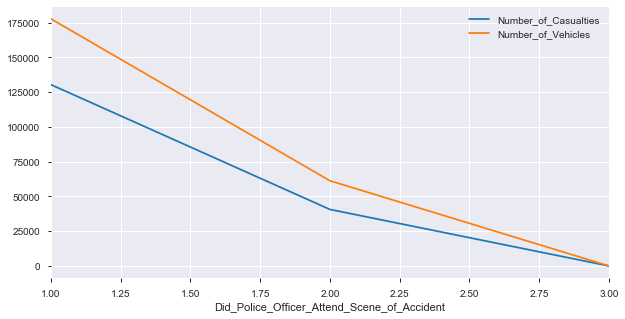

In [7]:
p.plot(x='Did_Police_Officer_Attend_Scene_of_Accident', y=['Number_of_Casualties', 'Number_of_Vehicles'])

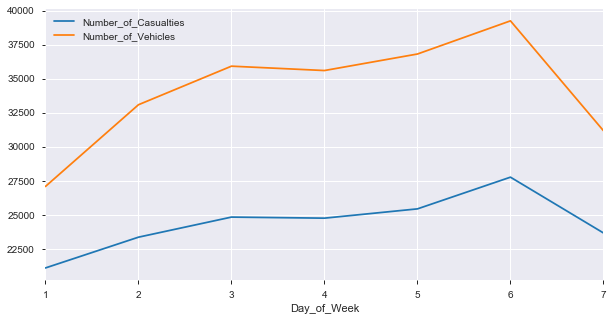

In [10]:
p.plot(x='Day_of_Week', y=['Number_of_Casualties', 'Number_of_Vehicles'])

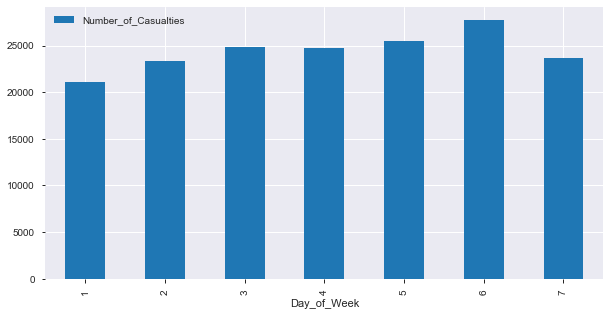

In [26]:
p.plot(x='Day_of_Week', y=['Number_of_Casualties'], kind='bar')

#### Ploting could also be done using timeseries, date column should be passed as x axis

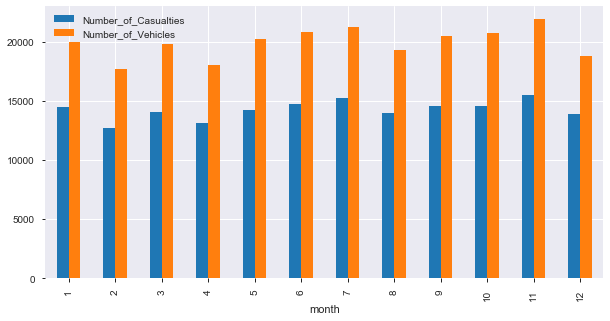

In [24]:
p.plot_timeseries('Date', ['Number_of_Casualties', 'Number_of_Vehicles'], plot_on='month', kind='bar')

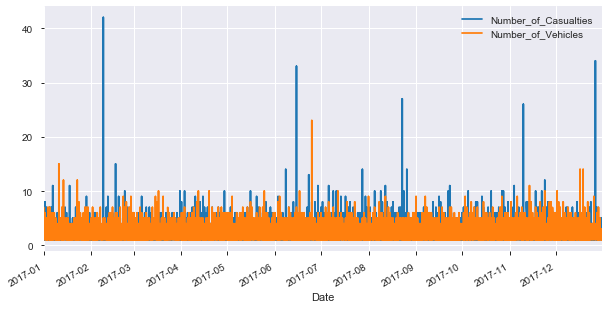

In [27]:
p.plot_timeseries('Date', ['Number_of_Casualties', 'Number_of_Vehicles'], plot_on='date')

#### Finding correlations between variables

In [29]:
p.correlation(subset=['Number_of_Casualties', 'Number_of_Vehicles', 'Light_Conditions'])

Number_of_Casualties  Number_of_Vehicles  \
Number_of_Casualties              1.000000            0.230437   
Number_of_Vehicles                0.230437            1.000000   
Light_Conditions                  0.030333           -0.058079   

                      Light_Conditions  
Number_of_Casualties          0.030333  
Number_of_Vehicles           -0.058079  
Light_Conditions              1.000000

In [23]:
p.correlation()

Location_Easting_OSGR  \
Location_Easting_OSGR                                     1.000000   
Location_Northing_OSGR                                   -0.439299   
Longitude                                                 0.999420   
Latitude                                                 -0.441596   
Police_Force                                             -0.371976   
Accident_Severity                                         0.031209   
Number_of_Vehicles                                        0.002478   
Number_of_Casualties                                     -0.034693   
Day_of_Week                                               0.001928   
Local_Authority_(District)                               -0.396577   
1st_Road_Class                                           -0.013057   
1st_Road_Number                                          -0.132287   
Road_Type                                                -0.011592   
Speed_limit                                              -0.092649   
Junction_Detail                                           0.031638   
Junction_Control                                          0.028451   
2nd_Road_Class                                            0.055025   
2nd_Road_Number                                          -0.037019   
Pedestrian_Crossing-Human_Control                        -0.027804   
Pedestrian_Crossing-Physical_Facilities                   0.050190   
Light_Conditions                                          0.010904   
Weather_Conditions                                        0.013408   
Road_Surface_Conditions                                  -0.098146   
Special_Conditions_at_Site                               -0.044539   
Carriageway_Hazards                                      -0.021293   
Urban_or_Rural_Area                                      -0.111528   
Did_Police_Officer_Attend_Scene_of_Accident               0.077138   

                                             Location_Northing_OSGR  \
Location_Easting_OSGR                                     -0.439299   
Location_Northing_OSGR                                     1.000000   
Longitude                                                 -0.448291   
Latitude                                                   0.999971   
Police_Force                                               0.173891   
Accident_Severity                                         -0.037046   
Number_of_Vehicles                                        -0.013550   
Number_of_Casualties                                       0.025232   
Day_of_Week                                                0.001759   
Local_Authority_(District)                                 0.135523   
1st_Road_Class                                             0.012222   
1st_Road_Number                                            0.063997   
Road_Type                                                  0.016077   
Speed_limit                                                0.072976   
Junction_Detail                                           -0.028898   
Junction_Control                                          -0.022897   
2nd_Road_Class                                            -0.047197   
2nd_Road_Number                                            0.026364   
Pedestrian_Crossing-Human_Control                          0.024819   
Pedestrian_Crossing-Physical_Facilities                   -0.015041   
Light_Conditions                                           0.000376   
Weather_Conditions                                        -0.001341   
Road_Surface_Conditions                                    0.084097   
Special_Conditions_at_Site                                 0.037444   
Carriageway_Hazards                                        0.010077   
Urban_or_Rural_Area                                        0.044353   
Did_Police_Officer_Attend_Scene_of_Accident               -0.000882   

                                             Longitude  Latitude  \
Location_Easting_OSGR      

#### Finding type of Variables could be challenging, Profiling makes use of pandas_profiling.model.describe.multiprocess_1d method to get the Variable type like is it Categorical or Num or any other type.

In [12]:
d = p.v_type(p.psubset(['Number_of_Casualties', 'Light_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident']))
for k, v in d.items():
    print(k, '\t', v['type'].value)

Number_of_Casualties 	 CAT
Light_Conditions 	 NUM
Did_Police_Officer_Attend_Scene_of_Accident 	 CAT


#### A single column could be converted to Datetime using the overriden to_datetime method. It currently supports one string type but more could be added

In [14]:
p2 = Profiling(file_path='Datasources/Acc.csv')
p2.read_csv()

In [18]:
str(p2.dtypes['Date'])

'object'

In [19]:
p2.to_datetime('Date')
str(p2.dtypes['Date'])

'datetime64[ns]'

#### Profile report could be generated for a Variable for more than one Variables or Complete Dataset, file name could be given to output flag to save an html

In [20]:
p2.profile(cols=['Number_of_Casualties'])

In [21]:
# Specify more than one column and only considering first 50 rows
p2.profile(cols=['Number_of_Casualties', 'Day_of_Week', 'Number_of_Vehicles', 'Light_Conditions'], subset=50) 

#### A full report could be generated when loading the dataset

In [22]:
Profiling(file_path='Datasources/Cas.csv', show_report=True).read_csv()